In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

import d2l

Mounted at /content/gdrive


# 1. Let’s modernize LeNet. Implement and test the following changes:
(a) Replace average pooling with max-pooling.

(b) Replace the softmax layer with ReLU.

First we give the original code prior to changing parts (a) and (b).

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [4]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


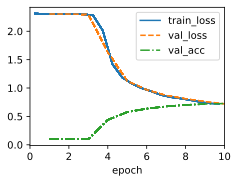

In [5]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

**(a) Replace average pooling with max-pooling.**

In [ ]:
# Change to Max pooling in the class definition

class LeNetMax(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNetMax()
model.layer_summary((1, 1, 28, 28))

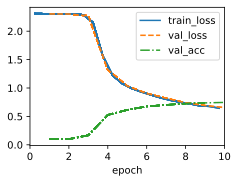

In [8]:
# Observe changes with max pooling implementation
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNetMax(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [9]:
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

acc: 0.58


Comparing the graphs, the max pooling change does not seem to significantly impact the accuracy of the LeNet model in our case.

**(b) Replace the softmax layer with ReLU.**

In [10]:
# Change to ReLU in the class definition

class LeNetReLU(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNetReLU()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


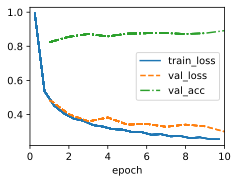

In [11]:
# Observe changes with ReLU implementation
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNetReLU(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [12]:
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

acc: 0.82


Replacing the softmax with ReLU significantly helps the accuracy - we can see that our accuracy gets up to 82% compared to the 58% we were at previously.

# 2. Try to change the size of the LeNet style network to improve its accuracy in addition to max-pooling and ReLU

**(a) Adjust the convolution window size.**


In [13]:
class ParamLeNet(d2l.Classifier):
    def __init__(self, convs, linears, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for conv in convs:
            layers.append(nn.LazyConv2d(conv[0], kernel_size=conv[1],
                                        padding=conv[2]))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        for linear in linears:
            layers.append(nn.LazyLinear(linear))
            layers.append(nn.ReLU())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)

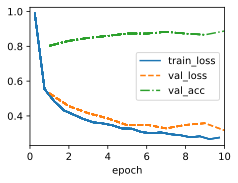

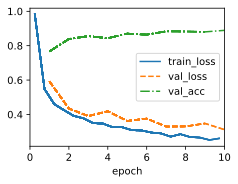

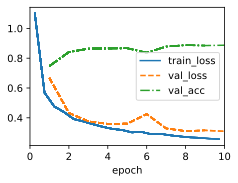

In [14]:
convs_list = [[[6,11,5],[16,11,0]],[[6,5,2],[16,5,0]],[[6,3,1],[16,3,0]]]
acc_list = []
for convs in convs_list:
    hparams = {'convs':convs, 'linears':[120,84]}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

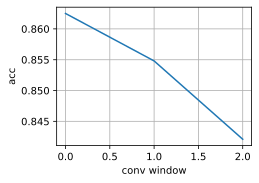

In [15]:
d2l.plot(list(range(len(acc_list))),acc_list,'conv window','acc')

The graph above suggests that the first convolution window size tested yields the highest accuracy. Looking at convs_list, we can see that this corresponds to the kernel size of 11. However, the difference in accuracy is quite minute.

**(b) Adjust the number of output channels.**

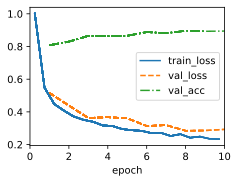

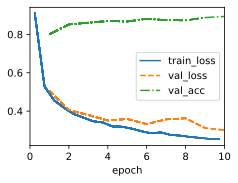

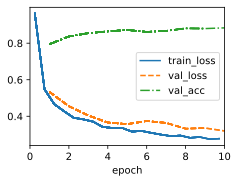

In [16]:
convs_list = [[[16,5,2],[32,5,0]],[[6,5,2],[16,5,0]],[[2,5,2],[8,5,0]]]
acc_list = []
for convs in convs_list:
    hparams = {'convs':convs, 'linears':[120,84]}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

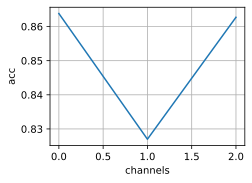

In [17]:
d2l.plot(list(range(len(acc_list))),acc_list,'channels','acc')

The above code tests 3 cases of output channels. The first case tests 16 and 32 output channels for the first and second layers, respectively. Likewise, the second case tests 6 and 16 (original), and the third tests 2 and 8.



**(c) Adjust the number of convolution layers.**

In [40]:
data = d2l.FashionMNIST(batch_size=128)
convs_list = [[[6,5,2],[16,5,2],[32,5,0]],[[6,5,2],[16,5,0]],[[64,5,0]]]
acc_list = []
for convs in convs_list:
    hparams = {'convs':convs, 'linears':[120,84]}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

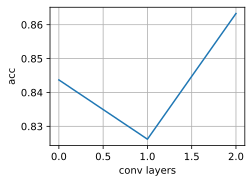

In [20]:
d2l.plot(list(range(len(acc_list))),acc_list,'conv layers','acc')

The above code tests 3, 2, and 1 convolution layer(s) respectively. The final graph highlights that either 3 or 1 convolution layer tends to be more accurate than 2 in this test case.

**(d) Adjust the number of fully connected layers.**

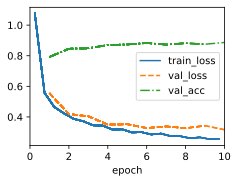

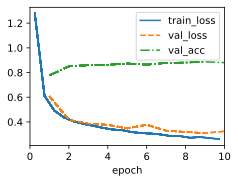

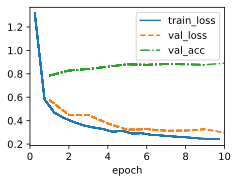

In [21]:
# Define different configurations for fully connected layers
linears_list = [[120, 84], [120, 84, 50], [120, 84, 50, 30]]

acc_list = []

# Iterate over different configurations of fully connected layers
for linears in linears_list:
    hparams = {'convs': [[6, 5, 2], [16, 5, 0]], 'linears': linears}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat, data.val.targets).item())


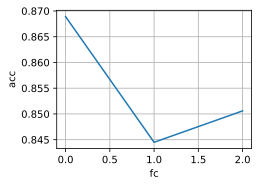

In [22]:
d2l.plot(list(range(len(acc_list))),acc_list,'fc','acc')

The above code tests 2, 3 and 4 fully connected layers, respectively, in LeNet configurations. It is clear that 2 layers is the most accurate, likely because adding further layers causes issues of overfitting and reduces accuracy.

**(e) Adjust the learning rates and other training details (eg. initialization and number of epochs).**

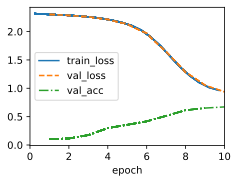

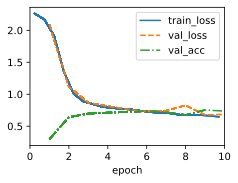

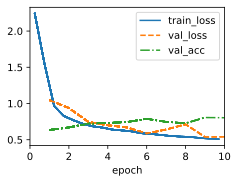

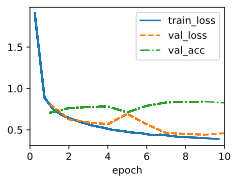

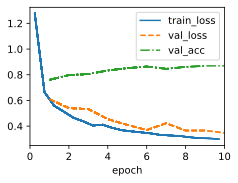

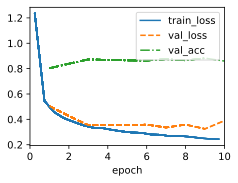

In [23]:
# Try various learning rates
data = d2l.FashionMNIST(batch_size=256)
lr_list = [0.001,0.003,0.01,0.03,0.1,0.3]
acc_list = []
for lr in lr_list:
    hparams = {'convs':[[6,5,2],[16,5,0]], 'linears':[120,84],'lr':lr}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

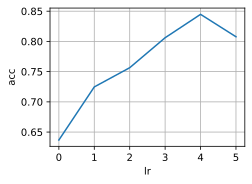

In [24]:
d2l.plot(list(range(len(acc_list))),acc_list,'lr','acc')

The above graph shows that learning rate can approach 0.1, but any higher is not beneficial. More epochs will undoubtedly increase accuracy so this is left at 10. Xavier initialization is known to be the most accurate option as well.

#3. Try out the improved network on the original MNIST dataset.


We will use the following parameters deemed most accurate from our analysis above:

kernel_size = 11

output channels = 16~32 --> use 24

1 convolution layer

2 fully connected layers

learning rate = 0.1

10 epochs

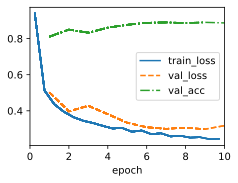

In [25]:
# New Updated Function
class LeNetOptimal(d2l.Classifier):

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(24, kernel_size=11, padding=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=11, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNetOptimal(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [26]:
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

acc: 0.85


Nice! Our new model is 85% accurate, beating the original updated one previously at 82%.

# 4. Display the activations of the first and second layer of LeNet for different inputs (e.g., sweaters and coats).

First we redefine the LeNet with two layers again.

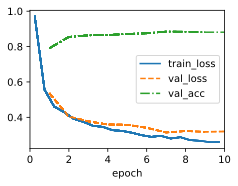

In [71]:
class LeNetReLU(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNetReLU(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

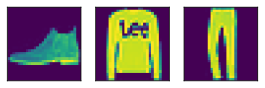

In [72]:
pic = data.val.data[:3,:].type(torch.float32).unsqueeze(dim=1)
d2l.show_images(pic.squeeze(),1,3)


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

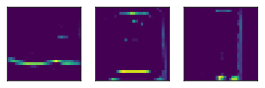

In [73]:
layer1 = model.net[0:2](pic).squeeze().detach().numpy()[0:9,1,:,:]
layer1.shape
d2l.show_images(layer1.reshape(3,28,28),1,3)


Above is the activation of the first layer (the first 2 sequential pieces from net).

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

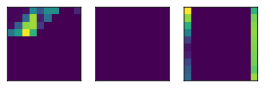

In [76]:
#d2l.show_images(model.net[0:5](pic).squeeze().detach().numpy())
layer2 = model.net[0:5](pic).squeeze().detach().numpy()[0:9,1,:,:]
layer2.shape
d2l.show_images(layer2.reshape(3,10,10),1,3)


Displaying the second layer reveals the depth of the network - the higher features of the images are no longer visible, and just random pixels are displayed very granularly.

#5. What happens to the activations when you feed signficantly different images into the network?

Let us use the KMNIST dataset (Japanese Hiragana characters) to feed our network.

array([<Axes: >, <Axes: >], dtype=object)

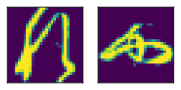

In [77]:
import torchvision
from torchvision import transforms
trans = transforms.Compose([transforms.Resize((28, 28)),
                                    transforms.ToTensor()])
data = torchvision.datasets.KMNIST(root='../data',train=True, transform=trans, download=True)
pic = data.data[:2,:].type(torch.float32).unsqueeze(dim=1)
d2l.show_images(pic.squeeze(),1,2)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

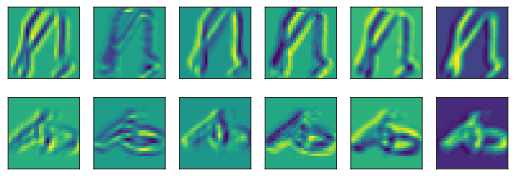

In [80]:
d2l.show_images(model.net[0](pic).squeeze().detach().numpy().reshape(-1,28,28),2,6)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

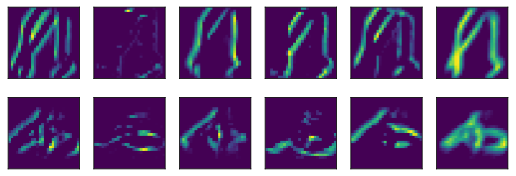

In [81]:
d2l.show_images(model.net[:2](pic).squeeze().detach().numpy().reshape(-1,28,28),2,6)


The activations, especially the second activation, are not nearly as granular showing the lower level of complexity/capability of the network.